In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
#train random forest, xgboost and gradient boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#load dataset
df = pd.read_csv('loan_data_logistic.csv')

#separate independent and target variables
X = df.drop('loan_status', axis = 1)
y = df['loan_status']

#divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=123)

def model_training(X_train,y_train, X_test, y_test, model):
    
    #instantiate model 
    model = model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'model is: {model}')
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_pred, y_test))
    print(classification_report(y_pred,y_test))
    
    
    

In [9]:
#train the model
models = [RandomForestClassifier,GradientBoostingClassifier,XGBClassifier]
for model in models:
    print(model_training(X_train,y_train,X_test,y_test,model))

model is: RandomForestClassifier()
0.9286666666666666
[[6815  421]
 [ 221 1543]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7236
           1       0.79      0.87      0.83      1764

    accuracy                           0.93      9000
   macro avg       0.88      0.91      0.89      9000
weighted avg       0.93      0.93      0.93      9000

None
model is: GradientBoostingClassifier()
0.9196666666666666
[[6744  431]
 [ 292 1533]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7175
           1       0.78      0.84      0.81      1825

    accuracy                           0.92      9000
   macro avg       0.87      0.89      0.88      9000
weighted avg       0.92      0.92      0.92      9000

None
model is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, d

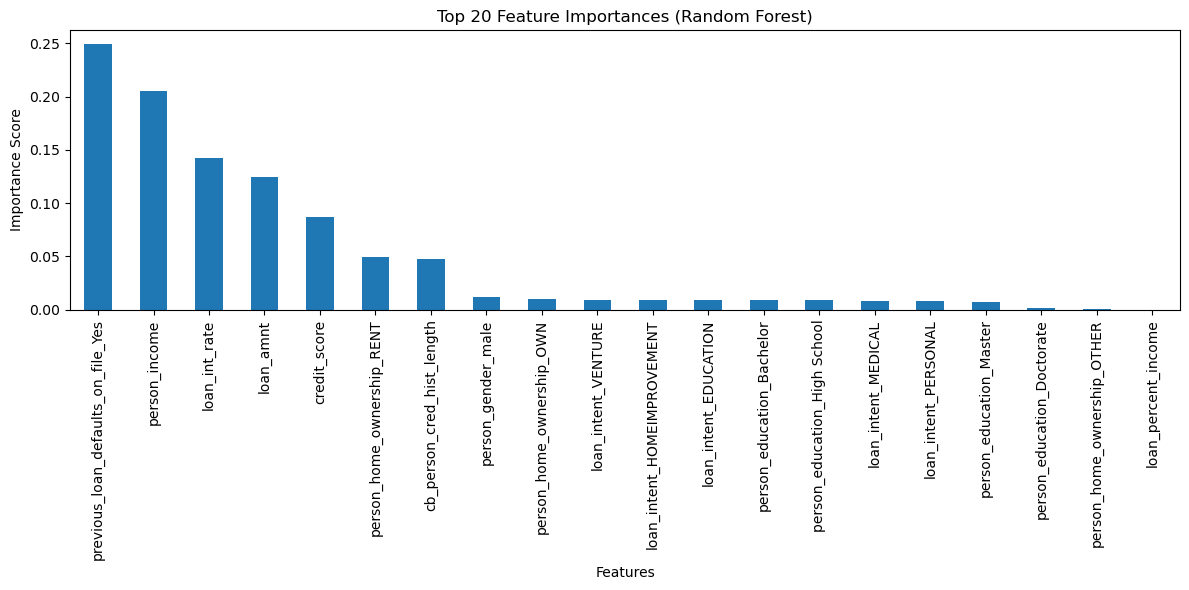

In [10]:
#plot feature importance in random forest
# Fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Create importance series
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top N features (e.g., top 20)
plt.figure(figsize=(12, 6))
feat_imp[:20].plot(kind='bar')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

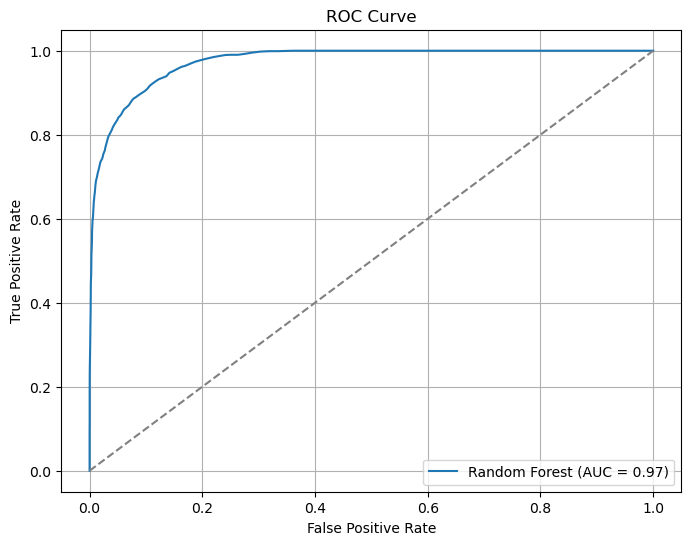

In [11]:
#plot AOC, ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
# Probabilities for the positive class (class 1)
y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
#plot curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
